### Estudo de caso base Iris

- https://www.kaggle.com/datasets/uciml/iris

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# from google.colab import drive
# drive.mount('/content/drive', force_remount=True)
from google.colab import files  
uploaded = files.upload()

Saving Iris.csv to Iris.csv


In [3]:
data = pd.read_csv('Iris.csv')

In [ ]:
type(data)

pandas.core.frame.DataFrame

### Informações gerais:

- 150 amostras e 4 features (sepal length, sepal width, petal length, petal width).
- Não valores faltantes (NaN)
- 50 amostras por espécie (setosa, versicolor, virginica).

In [ ]:
data.tail(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
140,141,6.7,3.1,5.6,2.4,Iris-virginica
141,142,6.9,3.1,5.1,2.3,Iris-virginica
142,143,5.8,2.7,5.1,1.9,Iris-virginica
143,144,6.8,3.2,5.9,2.3,Iris-virginica
144,145,6.7,3.3,5.7,2.5,Iris-virginica
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [ ]:
data.isna().value_counts()

Id     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
False  False          False         False          False         False      150
dtype: int64

### Tipo de dados:

- Variáveis Numéricas: Podem ser contínuas ou discretas.
    - Variáveis discretas: características mensuráveis que podem assumir apenas um número finito ou infinito contável de valores
        - Exemplos: número de filhos, número de bactérias por litro de leite, número de cigarros fumados por dia.
    - Variáveis contínuas, características mensuráveis que assumem valores em uma escala contínua (na reta real). 
        - Exemplos: peso (balança), altura (régua), tempo (relógio), pressão arterial, idade.


- Variáveis categóricas: são as características que não possuem valores quantitativos, representam uma classificação dos indivíduos:
    - Variáveis nominais: não existe ordenação dentre as categorias. Exemplos: sexo, cor dos olhos, fumante/não fumante, doente/sadio.
    - Variáveis ordinais: existe uma ordenação entre as categorias. Exemplos: escolaridade (1o, 2o, 3o graus), estágio da doença (inicial, intermediário, terminal), mês de observação (janeiro, fevereiro,..., dezembro).


### Transformação dados categóricos

In [ ]:
data['Species']

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Species'] = le.fit_transform(data['Species'])

In [ ]:
data['Species']

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 7.2 KB


### Métrica de avaliação

- Acurácia: indica uma performance geral do modelo. Dentre todas as classificações, quantas o modelo classificou corretamente;


$$Acuracidade = {\frac {Verdadeiros Positivos+Verdadeiros Negativos}{Total}} $$

### Documentação e métricas de distâncias (KNN)

* https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

* https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.distance_metrics.html#sklearn.metrics.pairwise.distance_metrics

#### Importando as bibliotecas do Sklearn

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [6]:
#preditores (atributos)
X = data.drop(['Id','Species'],axis=1).values
#Classe
y = data['Species'].values

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### Divisão da base em treino e teste

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(105, 4)
(105,)
(45, 4)
(45,)


In [ ]:
type(X_train)

numpy.ndarray

In [8]:
k = 5
knn = KNeighborsClassifier(n_neighbors=k,metric = 'euclidean')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.9777777777777777

In [ ]:
y_pred

array([1, 2, 0, 1, 0, 1, 2, 1, 0, 1, 1, 2, 1, 0, 0, 2, 1, 0, 0, 0, 2, 2,
       2, 0, 1, 0, 1, 1, 1, 2, 1, 1, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 1, 0,
       1])

In [ ]:
y_test

array([1, 2, 0, 1, 0, 1, 1, 1, 0, 1, 1, 2, 1, 0, 0, 2, 1, 0, 0, 0, 2, 2,
       2, 0, 1, 0, 1, 1, 1, 2, 1, 1, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 1, 0,
       1])

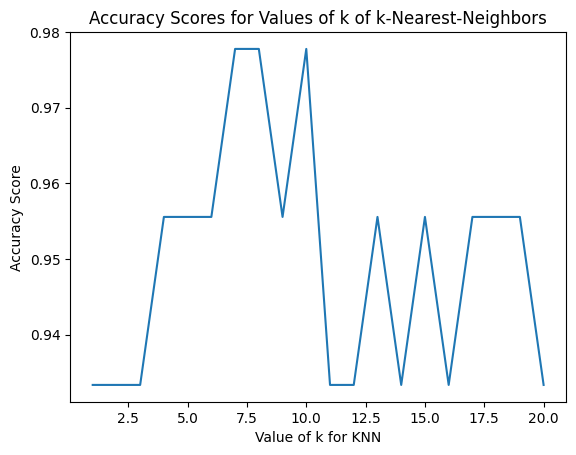

In [9]:
# Teste para diferentes valores de k
k_range = list(range(1,21))
scores = []
for k in k_range:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=8)
    knn = KNeighborsClassifier(n_neighbors=k,metric = 'euclidean')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

## Normalização dos dados

https://pt.linkedin.com/pulse/padroniza%C3%A7%C3%A3o-vs-normaliza%C3%A7%C3%A3o-jose-r-f-junior?trk=pulse-article

A normalização por reescala define, através de um valor mínimo e um valor máximo, um novo intervalo onde os valores de um atributo estarão contidos. Tipicamente, tal intervalo é definido como [0, 1]. Portanto, para este caso, a normalização por reescala de um atributo $j$ de um objeto $x_i$ pode ser calculada como:

$$ x_{ij} = \frac{x_{ij} - min_j}{max_j - min_j} $$

sendo min_j e max_j , nessa ordem, os valores mínimo e máximo do atributo $j$ para o conjunto de dados considerado.

Na normalização por padronização, os diferentes atributos contínuos poderão abranger diferentes intervalos, mas deverão possuir os mesmos valores para alguma medida de posição e de espalhamento/variação. 
Essas medidas irão consistir na média e no desvio-padrão. Neste caso, o valor normalizado de um atributo $j$
em um objeto $i$ é dado por:

$$ x_{ij} = \frac{x_{ij} - \bar{x}_j}{\sigma_j} $$

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(105, 4)
(105,)
(45, 4)
(45,)


In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Tipos de distâncias:

- https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.distance_metrics.html#sklearn.metrics.pairwise.distance_metrics

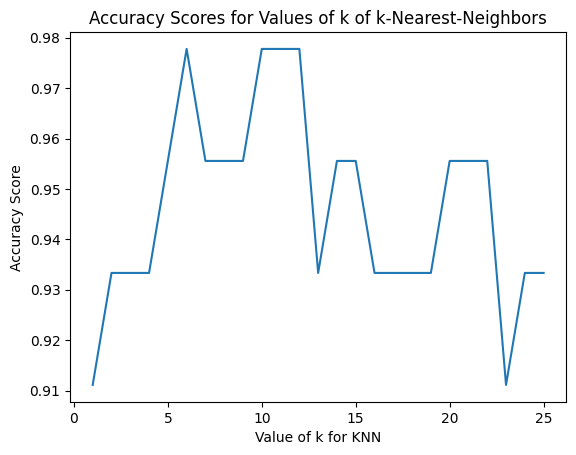

In [13]:
# experimenting with different n values
k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()